Bank of LAiMM wants to predict who are possible defaulters for the consumer loans product.
They have data about historic customer behavior based on what they have observed. Hence when
they acquire new customers, they want to predict who is riskier and who is not. You are required
to use the training dataset to identify patterns that predict “potential” defaulters. Name your
Jupyter notebook SVM and report SVM_report.docx.

(a) (20%) Plot the statics of training dataset. You may need to process training data before feeding
them into model.
This figure is an example, please plot the statistics of training data that are fed into the model

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('training.csv')

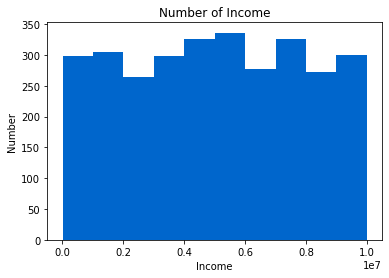

In [59]:
plt.hist(df.Income,  color = '#0066CC',  label = "Income")
plt.xlabel('Income')
plt.ylabel("Number")
plt.title("Number of Income")
plt.show()

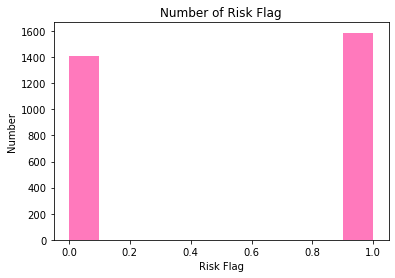

In [60]:
plt.hist(df.Risk_Flag,  color = '#FF79BC',  label = "Income")
plt.xlabel('Risk Flag')
plt.ylabel("Number")
plt.title("Number of Risk Flag")
plt.show()

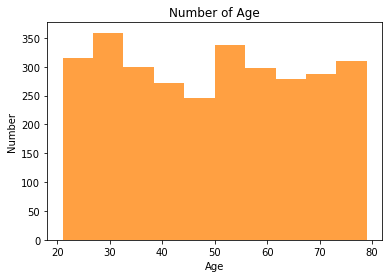

In [61]:
plt.hist(df.Age,  color = '#FFA042' )
plt.xlabel('Age')
plt.ylabel("Number")
plt.title("Number of Age")
plt.show()

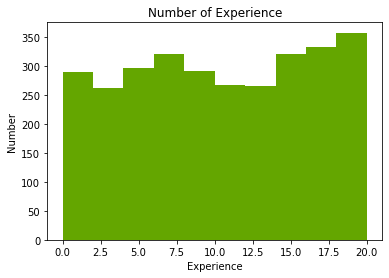

In [62]:
plt.hist(df.Experience,  color = '#64A600',  label = "Income")
plt.xlabel('Experience')
plt.ylabel("Number")
plt.title("Number of Experience")
plt.show()

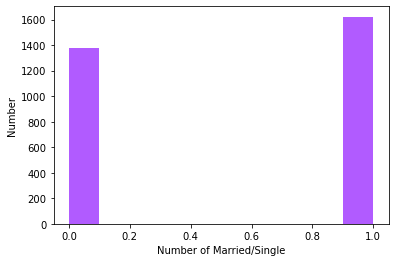

In [63]:
Married_Single = list(df['Married/Single'].map({'single':0, 'married':1}).astype(int))
plt.hist(Married_Single,  color = '#B15BFF', label = "Income")
plt.xlabel('Number of Married/Single')
plt.ylabel("Number")
plt.show()

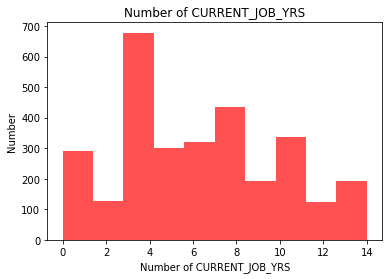

In [64]:
plt.hist(df.CURRENT_JOB_YRS, color = '#FF5151', label = "Income")
plt.xlabel('Number of CURRENT_JOB_YRS')
plt.ylabel("Number")
plt.title("Number of CURRENT_JOB_YRS")
plt.show()

(b) (40%) Use Support Vector Machine to identify possible defaulters, please report training
history, confusion matrix and accuracy. 

In [101]:
import pandas as pd #基於numpy的package,可以非常輕易的處理數據
import numpy as np #Numpy提供矩陣運算,可平行處理大量資料
import matplotlib.pyplot as plt #建立一組建立在Matplotlip上的API,定義常用圖表類型及整合Pandas Dataframe功能
import seaborn as sns #從資料中建立模型
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC # 1. choose "Support vector classifier"
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [102]:
#讓pandas讀取csv檔並畫出表格,確認檔按是否被讀
dataset_df = pd.read_csv('training.csv') #將讀入的"training.csv轉為data frame來做
#DataFrame就像是我們在使用的excel表格一樣，是一個二維的數據有index和column，可以透過index和column來找到我們要的某一筆資料。
cols = ['Income','Age','Experience','Married/Single','CURRENT_JOB_YRS','Risk_Flag'] #選取需要的資料
dataset_df[cols] #顯示

,Income,Age,Experience,Married/Single,CURRENT_JOB_YRS,Risk_Flag
0,8306358,47,15,single,14,0
1,4392927,41,2,single,2,1
2,208537,33,6,married,6,1
3,8752516,33,2,married,2,0
4,499939,25,17,married,9,0
...,...,...,...,...,...,...
2995,911309,69,12,single,9,1
2996,7475587,26,16,single,7,1
2997,4901476,39,16,married,4,1
2998,9400073,68,1,married,1,0


In [103]:
#資料處理
def Preprocess(raw_df):
    dataset_df = raw_df.drop( "Id", axis = 1) #去除機器訓練時的id欄位
    dataset_df = dataset_df.fillna(0)
    dataset_df['Married/Single'] = dataset_df['Married/Single'].map({'single':0, 'married':1}).astype(int)#將欄為中文字為single轉乘0, married轉1
    ndarray = dataset_df.values #dataframe轉為array,才能進行特徵工程
    features = ndarray[:,:5]#取features和labels
    label = ndarray[:,5]
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))#建立MinMaxScaler標準化刻度 minmax_scale
    #進行標準化將數字差異大的數字轉到0~1區間
    scaledFeatures = minmax_scale.fit_transform(features)
    return scaledFeatures, label   

In [104]:
#將資料分為77.52%(這個值是我亂設的)訓練資料 剩下的轉為測試資料
msk = np.random.rand(len(dataset_df)) < 0.7752 
train_df = dataset_df[msk]
test_df = dataset_df[~msk]

In [105]:
train_features, train_label = Preprocess(train_df)
test_features, test_label = Preprocess(test_df)

In [106]:
from sklearn.svm import SVC #載入Support Vector Classifier套件
model = SVC(kernel='rbf', gamma=5, C=250) # model 的內容
model.fit(train_features, train_label) #  將data套上model
test_model = model.predict(test_features) # predict on new data

# Accuracy

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label, test_model)

0.6404833836858006

In [108]:
from sklearn.model_selection import cross_val_score
history = cross_val_score(model, train_features, train_label, cv=10)

# Training history

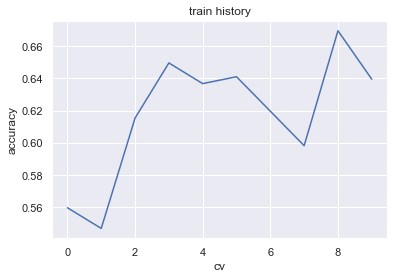

In [109]:
plt.plot(history)
plt.title('train history')
plt.xlabel('cv')
plt.ylabel('accuracy')
plt.show()

In [110]:
prediction = model.predict(test_features)

# Confusion matrix

TP(True Positive): 正確預測成功的正樣本，例如在一個預測是不是貓的圖像分類器，成功的把一張貓的照片標示成貓，即為TP
TN(True Negative): 正確預測成功的負樣本，以上述例子，成功的把一張狗的照片標示成不是貓，即為TN
FP(False Positive): 錯誤預測成正樣本，實際上為負樣本，例如：錯誤的把一張狗的照片標示成貓
FN(False Negative): 錯誤預測成負樣本(或者說沒能預測出來的正樣本)，例如：錯誤的把一張貓的照片標示成不是貓
所以這樣看下來，很直覺的，我們會知道TP跟TN要越大越好，但總是不會有完美的系統，因此就會出現出FP及FN

In [111]:
pd.crosstab(test_label, prediction, colnames=['predict'], rownames=['label'])

predict,0,1
label,,
0,179,137
1,101,245


Text(52.5, 0.5, 'no label                label')

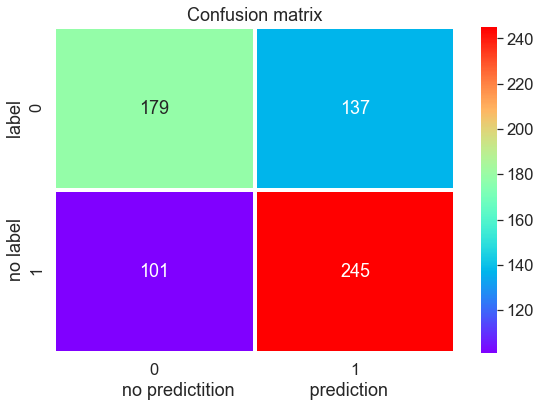

In [142]:
sns.set(font_scale= 1.5) #利用font_scale調整字體大小
f,ax=plt.subplots(figsize=(9, 6))# 繪製顯示數值的熱圖, figsize可以調整圖案大小
cf_matrix = confusion_matrix(test_label,prediction) #將test_label&prediction放入cf_matrix中
sns.heatmap(cf_matrix, cmap='rainbow', annot=True, linewidths=3,fmt='g')
#cmap 可以選擇圖的顏色
#annot annot为True时，可设置各个参数，包括大小，颜色，加粗，斜体字
#linewidth可以調整各個方塊的邊框寬度
#fmt='g'可以顯示完整數字
ax.set_title('Confusion matrix') #設定標題名稱
ax.set_xlabel('no predictition               prediction') #x軸名稱
ax.set_ylabel('no label                label') #y軸名稱

Ref:
    https://stackoverflow.com/questions/61526287/how-to-add-correct-labels-for-seaborn-confusion-matrix
    https://ithelp.ithome.com.tw/articles/10195183 (超推ㄉ喔)
    http://www.taroballz.com/2018/07/09/ML_Classifier_Model/
    https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea